In [49]:
import csv
import xml.etree.ElementTree as et
import numpy as np
from datetime import datetime as dt
import pandas as pd

In [12]:
tree = et.ElementTree(file = "f24-23-2018-1009324-eventdetails.xml")
games = tree.getroot()

In [13]:
match_details = games[0].attrib
match_details

{'id': '1009324',
 'away_score': '0',
 'away_team_id': '1450',
 'away_team_name': 'Getafe',
 'competition_id': '23',
 'competition_name': 'Spanish La Liga',
 'game_date': '2018-08-19T21:15:00',
 'home_score': '2',
 'home_team_id': '186',
 'home_team_name': 'Real Madrid',
 'matchday': '1',
 'period_1_start': '2018-08-19T21:15:10',
 'period_2_start': '2018-08-19T22:16:19',
 'season_id': '2018',
 'season_name': 'Season 2018/2019'}

In [14]:
tree2 = et.ElementTree(file = "srml-23-2018-squads.xml")
soccerfeed = tree2.getroot()

## List of players (all)

In [30]:
player_ids = []
player_names = []

for child in soccerfeed:
    for grchild in child:
        if grchild.tag == "Team":
            for grgrchild in grchild:
                if grgrchild.tag == "Player":
                    player_ids.append(grgrchild.attrib["uID"].lstrip('p'))
                                                        
                    for grgrgrchild in grgrchild:
                        
                        if grgrgrchild.tag == "Name":
                            player_names.append(grgrgrchild.text)
        #PlayerChanges
        elif grchild.tag == "PlayerChanges":
            for grgrchild2 in grchild:
                if grgrchild2.tag == "Team":
                    for grgrchild in grgrchild2:
                        if grgrchild.tag == "Player":
                            player_ids.append(grgrchild.attrib["uID"].lstrip('p'))

                            for grgrgrchild in grgrchild:

                                if grgrgrchild.tag == "Name":
                                    player_names.append(grgrgrchild.text)

                            



player_dict = dict(zip(player_ids, player_names))
player_dict

{'91406': 'Fernando Pacheco',
 '176245': 'Antonio Sivera',
 '439750': 'Álex Domínguez',
 '167539': 'Carlos Vigaray',
 '126119': 'Rubén Duarte',
 '93421': 'Rodrigo Ely',
 '49370': 'Víctor Laguardia',
 '155335': 'Guillermo Maripán',
 '90728': 'Ximo Navarro',
 '178873': 'Adrián Marín',
 '246162': 'Martín Aguirregabiria',
 '80956': 'Tomás Pina',
 '103263': 'Takashi Inui',
 '163817': 'Burgui',
 '55378': 'Manu García',
 '84700': 'Darko Brasanac',
 '55179': 'Mubarak Wakaso',
 '92190': 'Jony',
 '462986': 'Antonio Perera',
 '483881': 'Paulino De la Fuente',
 '458259': 'Álex Blanco',
 '148011': 'Diego Rolan',
 '82970': 'John Guidetti',
 '168287': 'Jonathan Calleri',
 '83091': 'Borja Bastón',
 '113965': 'Patrick Twumasi',
 '465474': 'Andrei Lupu',
 '197316': 'Álex Remiro',
 '89292': 'Iago Herrerín',
 '212769': 'Unai Simón',
 '220186': 'Hodei Oleaga',
 '242830': 'Unai Núñez',
 '90318': 'Íñigo Martínez',
 '197319': 'Yeray Álvarez',
 '42670': 'Yuri',
 '197314': 'Íñigo Lekue',
 '59062': 'Óscar De Mar

## Match preview summary

In [24]:
print ("%s v %s, %s %s" % (match_details["home_team_name"],
                          match_details["away_team_name"],
                          match_details["competition_name"][8:],
                          match_details["season_name"][7:]))


print ("Date: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                               "%A %d %B %Y"))

print ("Kick-off: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                               "%I%p").lstrip("0"))

Real Madrid v Getafe, La Liga 2018/2019
Date: Sunday 19 August 2018
Kick-off: 9PM


In [25]:
team_dict = {match_details["home_team_id"]: match_details["home_team_name"],
             match_details["away_team_id"]: match_details["away_team_name"]}

print (team_dict)

{'186': 'Real Madrid', '1450': 'Getafe'}


## Passes

In [26]:
# PASSES

passes_x = []
passes_y = []
passes_outcome = []
passes_min = []
passes_sec = []
passes_period = []
passes_team = []
passes_x_end = []
passes_y_end = []
passes_length = []
passes_angle = []
passes_zone = []
pass_real = []
pass_player = []

for game in games:
    for event in game:
        
        if event.attrib.get("type_id") == '1':
            #print (event.attrib.get("player_id"))
            passes_x.append(event.attrib.get("x"))
            passes_y.append(event.attrib.get("y"))
            passes_outcome.append(event.attrib.get("outcome"))
            passes_min.append(event.attrib.get("min"))
            passes_sec.append(event.attrib.get("sec"))
            passes_period.append(event.attrib.get("period_id"))
            passes_team.append(team_dict[event.attrib.get("team_id")])
            pass_player.append(player_dict[event.attrib.get("player_id")])
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                
                if qualifier == "140":
                    passes_x_end.append(q.attrib.get("value"))
                if qualifier == "141":
                    passes_y_end.append(q.attrib.get("value"))
                if qualifier == "212":
                    passes_length.append(q.attrib.get("value"))
                if qualifier == "213":
                    passes_angle.append(q.attrib.get("value"))
                if qualifier == "56":
                    passes_zone.append(q.attrib.get("value"))
                    
                             
passes_df = np.array(list(zip(passes_team, pass_player, passes_period, passes_min, passes_sec, passes_zone, passes_x, 
                        passes_y, passes_x_end, passes_y_end, passes_length, passes_angle,passes_outcome)))

print (passes_df)

fieldnames = ["team", "player", "period", "min", "sec", "pass zone", "x", "y", "x_end", "y_end",
              "pass length", "pass angle", "outcome"]

with open("pass_data_%s_%s.csv" % (match_details["home_team_name"], match_details["away_team_name"]),"w",newline='') as passes_csv:
        csv_file = csv.writer(passes_csv)
        csv_file.writerow(fieldnames)
        for i in range(len(passes_df)):
            csv_file.writerow(passes_df[i])

[['Real Madrid' 'Marco Asensio' '1' ... '15.4' '2.9' '1']
 ['Real Madrid' 'Toni Kroos' '1' ... '13.0' '4.8' '1']
 ['Real Madrid' 'Dani Ceballos' '1' ... '15.4' '4.5' '1']
 ...
 ['Real Madrid' 'Toni Kroos' '2' ... '11.2' '2.5' '1']
 ['Real Madrid' 'Marcelo' '2' ... '50.5' '0.3' '0']
 ['Getafe' 'Djené Dakonam' '2' ... '6.9' '0.8' '1']]


## Goals

In [28]:
# GOALS

goal_x = []
goal_y = []
goal_zone = []
goal_outcome = []
goal_min = []
goal_sec = []
goal_period = []
goal_team = []
goalmouth_y = []
goalmouth_z = []
goal_assisted = []
body_part = []
goal_player = []

body_dict = {"15": "head",
            "72": "left foot",
            "20": "right foot",
            "21": "other body part"}

for game in games:
    for event in game:
        
        if event.attrib.get("type_id") == '16':
            
            goal_x.append(event.attrib.get("x"))
            goal_y.append(event.attrib.get("y"))
            goal_outcome.append(event.attrib.get("outcome"))
            goal_min.append(event.attrib.get("min"))
            goal_sec.append(event.attrib.get("sec"))
            goal_period.append(event.attrib.get("period_id"))
            goal_team.append(team_dict[event.attrib.get("team_id")])
            goal_player.append(player_dict[event.attrib.get("player_id")])
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                
                
                if qualifier == "103":
                    goalmouth_z.append(q.attrib.get("value"))
                if qualifier == "102":
                    goalmouth_y.append(q.attrib.get("value"))
                if qualifier == "56":
                    goal_zone.append(q.attrib.get("value"))
                if qualifier in ["15", "72", "20", "21"]:
                    body_part.append(body_dict[qualifier])
                
                
                             
goal_df = np.array(list(zip(goal_team, goal_player, goal_period, goal_min, goal_sec, body_part, goal_zone, goal_x, 
                         goal_y, goalmouth_y, goalmouth_z, goal_outcome)))
print (goal_df)

goal_fieldnames = ["team", "player", "period", "min", "sec", "body part", "zone", "x", "y", 
                   "goalmouth y", "goalmouth z", "outcome", "assisted"]

with open("goal_data_%s_%s.csv" % (match_details["home_team_name"], match_details["away_team_name"]),"w",newline='') as goal_csv:
        csv_file = csv.writer(goal_csv)
        csv_file.writerow(goal_fieldnames)
        for i in range(len(goal_df)):
            csv_file.writerow(goal_df[i])

[['Real Madrid' 'Daniel Carvajal' '1' '19' '28' 'head' 'Center' '87.0'
  '36.3' '51.6' '21.5' '1']
 ['Real Madrid' 'Gareth Bale' '2' '50' '25' 'left foot' 'Center' '90.9'
  '42.8' '45.7' '8.9' '1']]


## ALL SHOTS

In [31]:
# ALL SHOTS

shot_name = []
shot_x = []
shot_y = []
shot_zone = []
shot_min = []
shot_sec = []
shot_period = []
shot_team = []
goalmouth_y = []
goalmouth_z = []
saved_x = []
saved_y = []
body_part = []
shot_play = []
shot_player = []

shot_dict = {'13': 'Shot off target',
             '14': 'Post',
             '15': 'Shot saved',
             '16': 'Goal'}

body_dict = {"15": "head",
            "72": "left foot",
            "20": "right foot",
            "21": "other body part"}

shot_play_dict = {'22': 'regular play',
            '23': 'fast break',
            '24': 'set piece',
            '25': 'from corner',
            '26': 'free kick',
            '96': 'corner situation',
            '112': 'scramble',
            '160': 'throw-in set piece',
            '9': 'penalty',
            '28': 'own goal'}

for game in games:
    
    for event in game:
        
        if event.attrib.get("type_id") in ['13', '14', '16']:
                    
            shot_name.append(shot_dict[event.attrib.get("type_id")])
            shot_x.append(event.attrib.get("x"))
            shot_y.append(event.attrib.get("y"))
            shot_min.append(event.attrib.get("min"))
            shot_sec.append(event.attrib.get("sec"))
            shot_period.append(event.attrib.get("period_id"))
            shot_team.append(team_dict[event.attrib.get("team_id")])
            shot_player.append(player_dict[event.attrib.get("player_id")])
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                if qualifier == '102':
                    saved_x.append('')
                    saved_y.append('')
                    goalmouth_y.append(q.attrib.get("value"))
                if qualifier == '103':
                    goalmouth_z.append(q.attrib.get("value"))
                if qualifier in body_dict.keys():
                    body_part.append(body_dict[qualifier])
                if qualifier in shot_play_dict.keys():
                    shot_play.append(shot_play_dict[qualifier])
                                   
        if event.attrib.get("type_id") == '15':
                    
            shot_name.append(shot_dict[event.attrib.get("type_id")])
            shot_x.append(event.attrib.get("x"))
            shot_y.append(event.attrib.get("y"))
            shot_min.append(event.attrib.get("min"))
            shot_sec.append(event.attrib.get("sec"))
            shot_period.append(event.attrib.get("period_id"))
            shot_team.append(team_dict[event.attrib.get("team_id")])
            shot_player.append(player_dict[event.attrib.get("player_id")])
                        
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                if qualifier == '146':
                    goalmouth_y.append('')
                    goalmouth_z.append('')
                    saved_x.append(q.attrib.get("value"))
                if qualifier == '147':
                    saved_y.append(q.attrib.get("value"))
                if qualifier in ["15", "72", "20", "21"]:
                    body_part.append(body_dict[qualifier])
                if qualifier in shot_play_dict.keys():
                    shot_play.append(shot_play_dict[qualifier])
                               
                             
shot_df = np.array(list(zip(shot_team, shot_player, shot_period, shot_min, shot_sec, shot_play, shot_name, body_part, shot_x, shot_y, 
                       goalmouth_y, goalmouth_z, saved_x, saved_y)))
    
print (shot_df)

shot_fieldnames = ["team", "player", "period", "min", "sec", "shot play", "shot type", "body part", "x", "y", "goalmouth y", 
                   "goalmouth z", "saved x", "saved y"]

with open("shot_data_%s_%s.csv" % (match_details["home_team_name"], match_details["away_team_name"]), 
          "w",newline='') as shot_csv:
        csv_file = csv.writer(shot_csv)
        csv_file.writerow(shot_fieldnames)
        for i in range(len(shot_df)):
            csv_file.writerow(shot_df[i])

[['Real Madrid' 'Gareth Bale' '1' '15' '21' 'regular play' 'Post' 'head'
  '92.0' '52.8' '48.0' '39.9' '' '']
 ['Real Madrid' 'Daniel Carvajal' '1' '19' '28' 'regular play' 'Goal'
  'head' '87.0' '36.3' '51.6' '21.5' '' '']
 ['Real Madrid' 'Marco Asensio' '1' '25' '21' 'regular play'
  'Shot off target' 'left foot' '87.9' '23.9' '59.3' '51.4' '' '']
 ['Real Madrid' 'Karim Benzema' '1' '32' '36' 'regular play' 'Shot saved'
  'left foot' '94.7' '71.8' '' '' '95.2' '69.3']
 ['Real Madrid' 'Gareth Bale' '2' '50' '25' 'regular play' 'Goal'
  'left foot' '90.9' '42.8' '45.7' '8.9' '' '']
 ['Real Madrid' 'Marco Asensio' '2' '53' '25' 'regular play' 'Post'
  'right foot' '78.7' '53.4' '55.1' '16.5' '' '']
 ['Real Madrid' 'Marco Asensio' '2' '59' '46' 'regular play' 'Shot saved'
  'left foot' '83.5' '48.4' '' '' '97.2' '50.2']
 ['Getafe' 'Mauro Arambarri' '2' '69' '2' 'regular play'
  'Shot off target' 'right foot' '75.9' '43.7' '50.1' '72.2' '' '']
 ['Real Madrid' 'Gareth Bale' '2' '69' '54' '

## Ball touch

In [81]:

def custom_x (x):
    return float(x) * 130 / 100

def custom_y (y):
    return float(y) * 90 / 100


In [101]:
ball_touch_x = []
ball_touch_y = []
ball_touch_custom_x = []
ball_touch_custom_y = []
ball_touch_zone = []
ball_touch_outcome = []
ball_touch_min = []
ball_touch_sec = []
ball_touch_period = []
ball_touch_team = []
ball_touch_q = []
ball_touch_player = []



for game in games:
    for event in game:
        
        if event.attrib.get("type_id") == '61':
            
            ball_touch_x.append(event.attrib.get("x"))
            ball_touch_y.append(event.attrib.get("y"))
            ball_touch_custom_x.append(custom_x(event.attrib.get("x")))
            ball_touch_custom_y.append(custom_y(event.attrib.get("y")))
            ball_touch_outcome.append(event.attrib.get("outcome"))
            ball_touch_min.append(event.attrib.get("min"))
            ball_touch_sec.append(event.attrib.get("sec"))
            ball_touch_period.append(event.attrib.get("period_id"))
            ball_touch_team.append(team_dict[event.attrib.get("team_id")])
            ball_touch_player.append(player_dict[event.attrib.get("player_id")])
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                
                
                if qualifier == "56":
                    ball_touch_q.append(q.attrib.get("value"))

ball_touch = np.array(list(zip(ball_touch_team, ball_touch_player, ball_touch_period, ball_touch_min, 
                               ball_touch_sec, ball_touch_q, 
                               ball_touch_x, ball_touch_y, ball_touch_outcome, ball_touch_custom_x, ball_touch_custom_y
                                  )))



#data["custom_x"] = custom_x(data["x"])


ball_touch_title = ["team", "player", "period", "min", "sec", "type", "x", "y", "outcome", "custom_x", 
                    "custom_y"]


data = pd.DataFrame (ball_touch, columns=ball_touch_title)

print(data.head())

          team              player period min sec    type     x     y outcome  \
0       Getafe        Amath Ndiaye      1   1  35    Back  44.6  90.9       1   
1  Real Madrid                Isco      1   2  31    Left  67.8  97.1       0   
2       Getafe     Leandro Cabrera      1   4   4    Left  66.4  80.9       1   
3       Getafe        Amath Ndiaye      1   5  51  Center  81.9  67.0       1   
4       Getafe  Nemanja Maksimovic      1   6  12    Back  15.0  55.5       1   

  custom_x custom_y  
0    57.98    81.81  
1    88.14    87.39  
2    86.32    72.81  
3   106.47     60.3  
4     19.5    49.95  


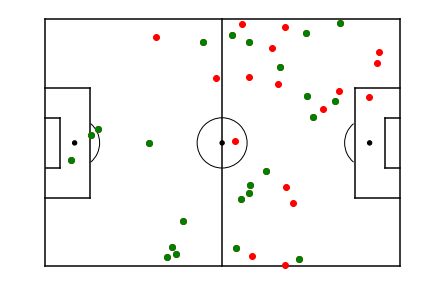

In [100]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

%matplotlib inline


#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')
#plt.plot([int(data["x"][i]),int(data["Xend"][i])],[int(data["Ystart"][i]),int(data["Yend"][i])], color="blue")


data_real = data[data["team"]=="Real Madrid"]
data_getafe = data[data["team"]=="Getafe"]

for i in range(len(data)):
    plt.plot(custom_x(data["x"][i]),custom_y(data["y"][i]),"o", color="red")


for i, row in data_getafe.
():
    plt.plot(custom_x(row["x"]),custom_y(row["y"]),"o", color="green")

    
    
#Display Pitch
plt.show()

## Heap map Real

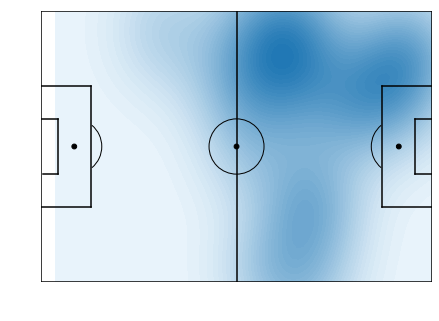

In [102]:
import seaborn as sns

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(data_real["custom_x"],data_real["custom_y"], shade=True,n_levels=50)
plt.ylim(0, 90)
plt.xlim(0, 130)


#Display Pitch
plt.show()

## Heap Map Getafe

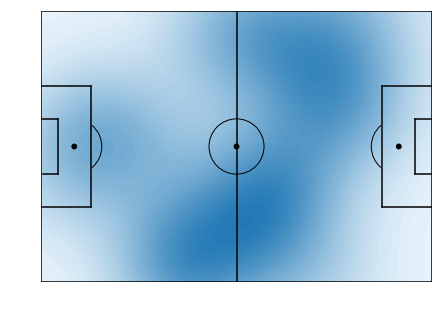

In [103]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(data_getafe["custom_x"],data_getafe["custom_y"], shade=True,n_levels=50)
plt.ylim(0, 90)
plt.xlim(0, 130)


#Display Pitch
plt.show()